In [19]:
import sys
%pylab inline
from importlib import reload
plt.style.use('default')

Populating the interactive namespace from numpy and matplotlib


In [20]:
from pathlib import Path
root_path = Path().resolve().parent  # Adjust based on your structure
sys.path.append(str(root_path))

In [21]:
import common
reload(common)

<module 'common' from '/nemo/lab/schaefera/working/tootoos/git/prml/common.py'>

In [92]:
noise_sd = 0.25
N = 10
x, y = common.generate_sinusoidal_data(seed=1,noise_sd = noise_sd, n_obs = N)

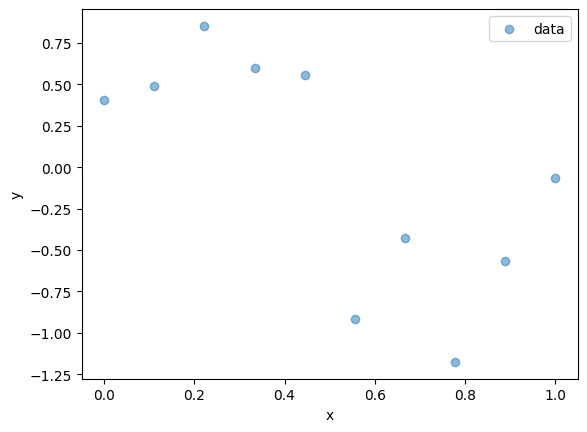

In [93]:
scatter(x, y, c='C0', marker='o', alpha=0.5, label='data')
xlabel('x'); ylabel('y'); legend()

In [94]:
def polynomial_basis_function(x, M):
    return np.array([x ** m for m in range(M + 1)]).T

In [125]:
β   = 1/noise_sd**2
α   = 5e-4

In [130]:
M_vals = arange(10)
E_m, log_detA, log_evidence = [], [], []
for M in M_vals:
    Phi = polynomial_basis_function(x, M)
    A = α * eye(M+1) + β * Phi.T @ Phi
    m = β * inv(A) @ Phi.T @ y
    E_m.append(β/2 * norm(y - Phi @ m)**2 + α/2 * m @ m)
    log_detA.append(log(det(A)))
    log_evidence.append(M/2 * log(α) + N/2 * log(β) - E_m[-1] - 1/2 * log_detA[-1] - N/2 * log(2 * pi))
E_m = array(E_m)
log_detA = array(log_detA)
log_evidence = array(log_evidence)

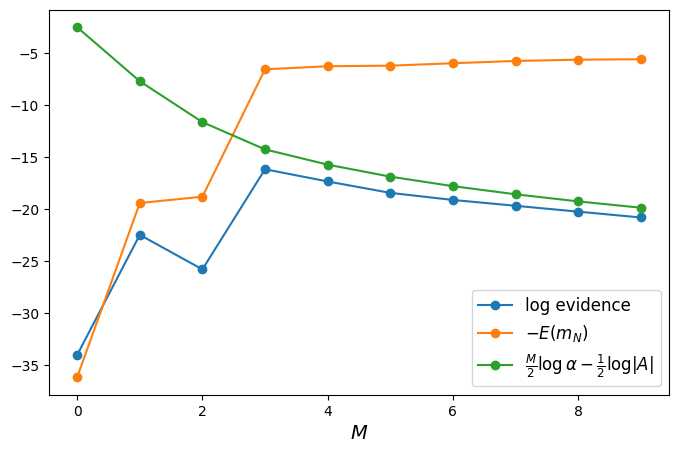

In [155]:
figure(figsize=(8,5))
plot(M_vals, log_evidence, 'o-', label='log evidence')
plot(M_vals, -E_m,         "o-", label='$-E(m_N)$')
plot(M_vals, -log_detA/2 + M_vals/2 * log(α)  ,    'o-', color="C2", label='$\\frac{M}{2} \log \\alpha -\\frac{1}{2}\log |A|$')
xlabel('$M$', fontsize=14); legend(fontsize=12)